In [203]:
import cv2
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import random
import glob

In [132]:
def get_gt_contours(i):
    gt_contours = []
    boxes = digitStruct.loc[f'{str(i)}.png', 'boxes']
    for box in boxes:
        x = box['left']
        y = box['top']
        w = box['width']
        h = box['height']
        label = int(box['label'])
        gt_contours.append([x, y, x+w, y+h,label])
    return gt_contours

In [328]:
new_templates = []
for tmp_path in glob.glob('NEW_NUMBERS/*.jpg'):
        tmp = cv2.imread(tmp_path)
        gray = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
        new_templates.append(thresh)
print(len(new_templates))

90


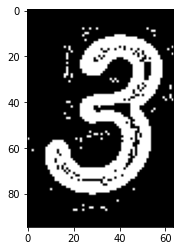

In [329]:
plt.imshow(new_templates[60],cmap = 'gray')

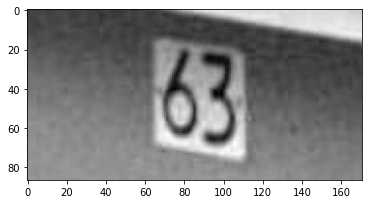

In [312]:
# i=random.randint(1,30000)
# i=175
# i=121
#i=19
# i=4005
# i=269
# i = 933
# i=1180
# i=745
# i=14
i=12
img = cv2.imread(f'data/train/{i}.png')
img2 = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [313]:
win_size = (20, 20)   
block_size = (10, 10) 
block_stride = (5, 5) 
cell_size = (5, 5)    
nbins = 9             

hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

In [314]:
digitStruct = pd.read_json('data/train/digitStruct.json')
digitStruct.set_index('filename', inplace=True)
digitStruct.head()

,boxes
filename,
1.png,"[{'height': 219.0, 'label': 1.0, 'left': 246.0..."
2.png,"[{'height': 32.0, 'label': 2.0, 'left': 77.0, ..."
3.png,"[{'height': 15.0, 'label': 2.0, 'left': 17.0, ..."
4.png,"[{'height': 34.0, 'label': 9.0, 'left': 57.0, ..."
5.png,"[{'height': 46.0, 'label': 3.0, 'left': 52.0, ..."


In [315]:
gt_contours = get_gt_contours(i)
print(len(gt_contours))
gt_contours

2


[[67.0, 16.0, 90.0, 71.0, 6], [90.0, 17.0, 110.0, 72.0, 3]]

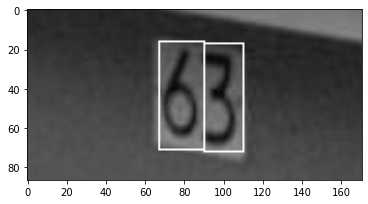

In [316]:
gt_boxes = img.copy()
for contour in gt_contours:
    contour = list(map(int, contour)) # To cast all point values to integers (loaded from json file as float)
    [x1, y1, x2, y2,label] = contour
    cv2.rectangle(gt_boxes, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(cv2.cvtColor(gt_boxes, cv2.COLOR_BGR2RGB))

In [317]:
gt_contours = [list(map(int,contour)) for contour in gt_contours]
gt_contours

[[67, 16, 90, 71, 6], [90, 17, 110, 72, 3]]

In [318]:
templates = []
for row in range(1,11):
    for col in range(1,11):
        template = cv2.imread(f"Templates/numbers/PineTools.com_2023-05-08_07h18m28s/PineTools.com_files/row-{row}-column-{col}.png")
        gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
        thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,20)
        templates.append(thresh)

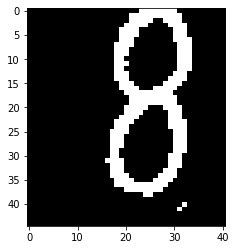

In [319]:
plt.imshow(templates[18],cmap='gray')

52
49


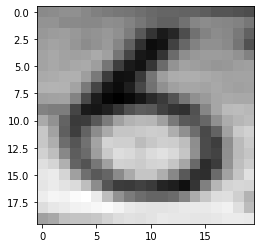

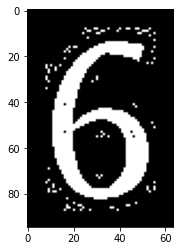

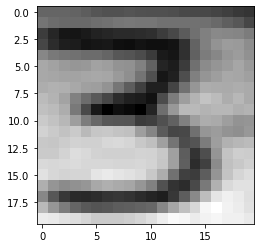

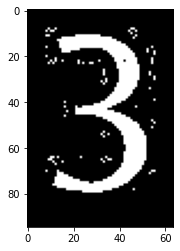

In [320]:
for contour in gt_contours:
    score=0
    [x1, y1, x2, y2,label] = contour
    cv2.rectangle(gt_boxes, (x1,y1), (x2,y2), (255,0,0), 1)
    digit = img[y1:y2,x1:x2]
    digit_resized = cv2.resize(digit, win_size)
    plt.figure()
    plt.imshow(digit_resized,cmap = 'gray')
    digit_hog = hog.compute(digit_resized).reshape(-1)
    scores = []
    for template in new_templates:
        
        template_resized = cv2.resize(template, win_size)
#         plt.figure()
#         plt.imshow(template_resized,cmap = 'gray')
        template_hog = hog.compute(template_resized).reshape(-1)
        score = np.dot(digit_hog, template_hog)
        scores.append(score)
    digit = scores.index(max(scores))
    plt.figure()
    plt.imshow(new_templates[digit],cmap = 'gray')
#     cv2.rectangle(img2, (x1,y1), (x2,y2), (0,255,0), 1)
#     cv2.putText(img2,str(digit%10), (x1, y1-1), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    
    print(digit)

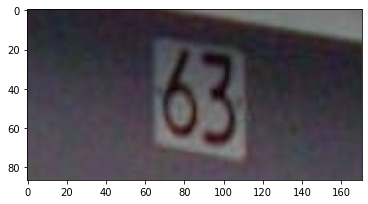

In [321]:
plt.imshow(img2,cmap='gray')